<a href="https://colab.research.google.com/github/manjunathsirur1994/DataCleaning-EDA/blob/main/Importance_of_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importance of Feature Scaling

- The tree based models are not affected by standardization, but amny models like KNN will require standardization since the models may try to give more importance to features with larger values and ranges compared to lower ranges, in case of KNN it finds the distance between the datapoints, which might be totally wrong if there is difference in the ranges of feature columns.



- We will also see how PCA will be affected by normalization. To illustrate this we will see PCA on unscaled data and scaled data.



- We will be using wine recognition dataset to illustrate these examples.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
x,y = load_wine(return_X_y=True, as_frame=True)

# Lets see how x and y look like
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [4]:
# setting up standard scaler and splitting data into train and test sets

scaler = StandardScaler().set_output(transform = 'pandas')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train_scaled = scaler.fit_transform(x_train)

##Effect of rescaling on a k-neighbors models

For the sake of visualizing the decision boundary of a KNeighborsClassifier, lets select a subset of 2 features that have values with different orders of magnitude.

In [5]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

In [6]:
x_plot = x[['proline','hue']]
x_plot_scaled = scaler.fit_transform(x_plot)
clf = KNeighborsClassifier(n_neighbors=20)

In [7]:
def fit_and_plot_model(x_plot, y, clf):
  clf.fit(x_plot, y)
  disp = DecisionBoundaryDisplay.from_estimator(
      clf,
      x_plot,
      response_method='predict'
      # alpha = 0.5
  )
  disp.ax_.scatter(x_plot['proline'], x_plot['hue'], c=y, edgecolor='k')
  return disp

Text(0.5, 1.0, 'KNeighborsClassifier with scaling')

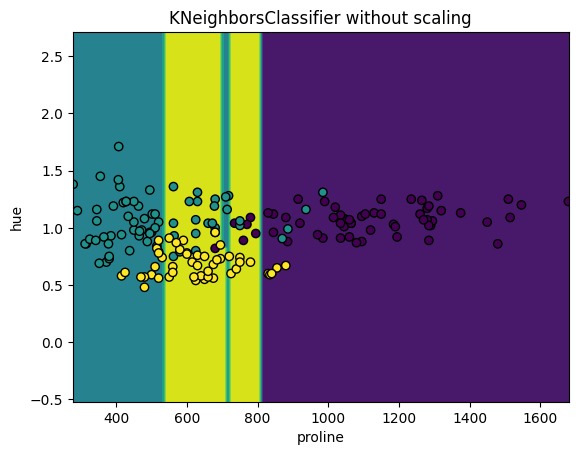

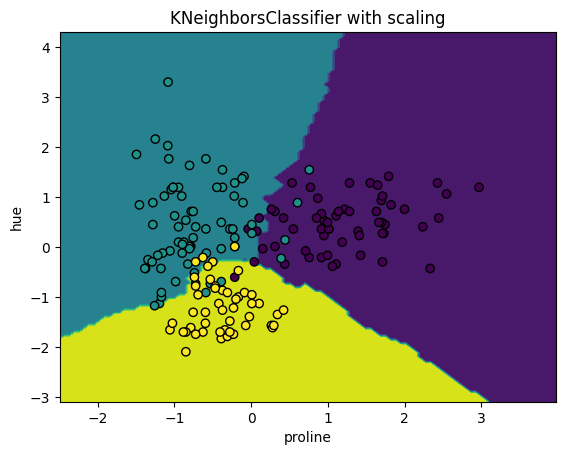

In [8]:
fit_and_plot_model(x_plot, y, clf);
plt.title('KNeighborsClassifier without scaling')
fit_and_plot_model(x_plot_scaled, y, clf);
plt.title('KNeighborsClassifier with scaling')

##Effect of rescaling on a PCA dimensional reduction

Dimensional reduction using PCA consists of finding the features that maximize the variance. If one feature varies more than the others only because of their respective scales, PCA would determine that such feature dominates the direction of the principal components.

In [9]:
import pandas as pd
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2).fit(x_train)
scaled_pca = PCA(n_components=2).fit(x_train_scaled)

x_test_pca_transformed = pca.transform(x_train)
x_test_scaled_pca_transformed = scaled_pca.transform(x_train_scaled)

In [11]:
# Lets see the values of each of the features
pca.components_[0]

array([ 1.68297892e-03, -8.46613443e-04,  1.79363589e-04, -5.31121651e-03,
        1.86789711e-02,  9.90590395e-04,  1.56049730e-03, -1.19380790e-04,
        6.16467597e-04,  2.18234050e-03,  1.57988755e-04,  7.54114647e-04,
        9.99805050e-01])

In [12]:
scaled_pca.components_[0]

array([ 0.12753249, -0.25623655, -0.02236181, -0.24428137,  0.14757757,
        0.38490786,  0.41950095, -0.2992598 ,  0.30843734, -0.11907301,
        0.29949964,  0.38381622,  0.27587548])

In [ ]:
# Lets see feature columns and their important in a dataframe format. [without scaling]
pd.DataFrame(pca.components_[0], index=x.columns, columns=['without_scaling'])

,without_scaling
alcohol,0.001683
malic_acid,-0.000847
ash,0.000179
alcalinity_of_ash,-0.005311
magnesium,0.018679
total_phenols,0.000991
flavanoids,0.001560
nonflavanoid_phenols,-0.000119
proanthocyanins,0.000616
color_intensity,0.002182


In [ ]:
# Lets see feature columns and their important in a dataframe format. [with scaling]
pd.DataFrame(scaled_pca.components_[0], index=x.columns, columns=['with_scaling'])

,with_scaling
alcohol,0.127532
malic_acid,-0.256237
ash,-0.022362
alcalinity_of_ash,-0.244281
magnesium,0.147578
total_phenols,0.384908
flavanoids,0.419501
nonflavanoid_phenols,-0.299260
proanthocyanins,0.308437
color_intensity,-0.119073


In [ ]:
# lets see how pca transformed data look like
x_test_pca_transformed

array([[-7.49349515e+01, -8.62866599e-01],
       [-2.19971071e+02, -2.52597701e-01],
       [-7.51038966e+01, -1.10615564e+01],
       [-1.15087077e+02, -9.17867162e+00],
       [ 2.85024471e+02, -7.83445476e+00],
       [-4.22971985e+02, -6.02842277e-01],
       [-2.84862447e+02,  3.80522761e+00],
       [ 1.52899280e+01,  9.20255499e+00],
       [-1.85024331e+02, -5.01070474e+00],
       [ 4.50038279e+02, -7.81507097e+00],
       [-2.49481611e+01, -3.03617323e+00],
       [-3.69839061e+02,  8.54780405e+00],
       [-9.48291814e+01,  4.35146401e+00],
       [ 5.29900044e+02, -1.63311491e+01],
       [-3.43079063e+02, -8.13757163e+00],
       [ 2.35413393e+02,  1.31272425e+01],
       [ 4.59897892e+02, -1.60625383e+01],
       [-5.99146817e+01, -1.30757504e+00],
       [-1.55099663e+02, -9.56374993e+00],
       [-6.31805038e+01, -1.42643037e+01],
       [ 1.57879457e+01,  3.51589959e+01],
       [ 1.45278544e+02,  6.77195019e+00],
       [-4.45038801e+02, -4.22160389e+00],
       [ 3.

In [ ]:
# lets see how pca transformed on scaled data look like
x_test_scaled_pca_transformed

array([[-1.16602698e+00,  3.61532732e+00],
       [-3.86261156e+00,  4.82177461e-01],
       [ 2.28353786e+00, -1.27503318e+00],
       [-1.67850727e+00,  2.49696152e+00],
       [ 1.57284216e+00, -6.88203487e-01],
       [ 2.02555486e-01, -2.22577338e+00],
       [ 8.83338617e-01, -2.00469937e+00],
       [-7.15050214e-01, -2.02557575e-01],
       [-2.31535447e+00,  3.50467442e-01],
       [ 2.48181734e+00,  1.19480758e+00],
       [ 9.27003335e-01, -2.36914720e+00],
       [-1.10503027e+00, -7.91750104e-01],
       [-2.64179811e+00,  3.73566993e-01],
       [ 2.82856352e+00,  9.08533324e-01],
       [ 4.68714502e-01, -2.12468019e+00],
       [ 2.70840181e+00,  1.53490440e+00],
       [ 1.78020693e+00,  8.47127661e-01],
       [-2.75483138e+00,  2.13895379e+00],
       [-3.00838158e+00,  2.84596615e-01],
       [ 5.08790176e-01, -2.03246235e+00],
       [ 1.36844583e+00, -7.60471135e-01],
       [ 1.38621221e+00,  7.05661067e-01],
       [ 8.27658568e-01, -2.30685810e+00],
       [ 2.

In [ ]:
# plotting feature importance using PCA for scaled and unscaled data

feature_imp_data = pd.DataFrame(pca.components_[0], index=x.columns, columns=['without_scaling'])
feature_imp_data['with_scaling'] = scaled_pca.components_[0]
feature_imp_data

,without_scaling,with_scaling
alcohol,0.001683,0.127532
malic_acid,-0.000847,-0.256237
ash,0.000179,-0.022362
alcalinity_of_ash,-0.005311,-0.244281
magnesium,0.018679,0.147578
total_phenols,0.000991,0.384908
flavanoids,0.001560,0.419501
nonflavanoid_phenols,-0.000119,-0.299260
proanthocyanins,0.000616,0.308437
color_intensity,0.002182,-0.119073


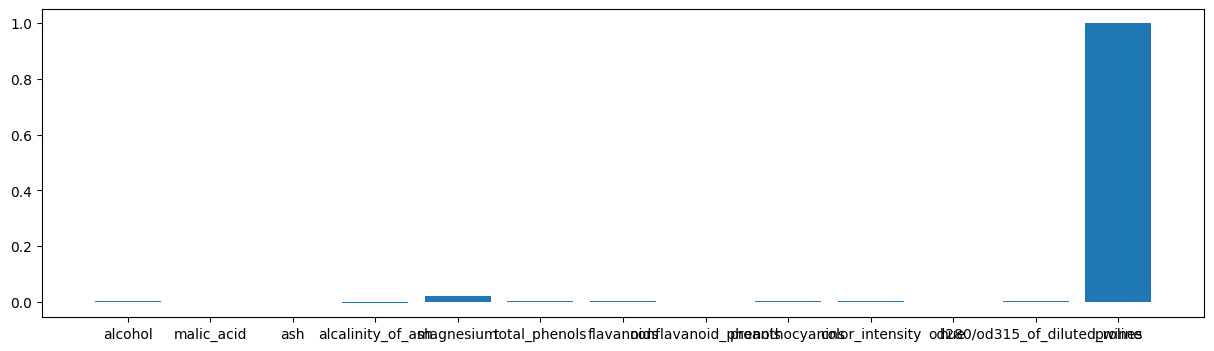

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(feature_imp_data.index, feature_imp_data['without_scaling']);

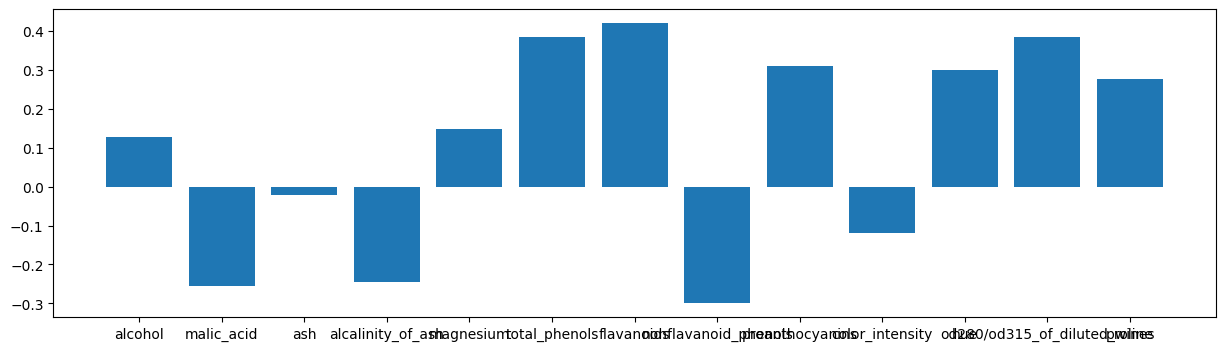

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(feature_imp_data.index, feature_imp_data['with_scaling']);

In [ ]:
# pd.DataFrame(x_test_pca_transformed)
plot_data_without_scaling = pd.DataFrame(x_test_pca_transformed)
plot_data_with_scaling = pd.DataFrame(x_test_scaled_pca_transformed)

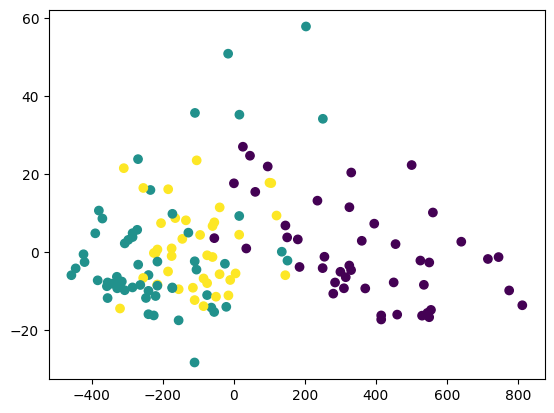

In [ ]:
# Scatter plot differentiating between classes with and without scaled data.

plt.scatter(x=plot_data_without_scaling[0],
            y=plot_data_without_scaling[1],
            c = y_train);

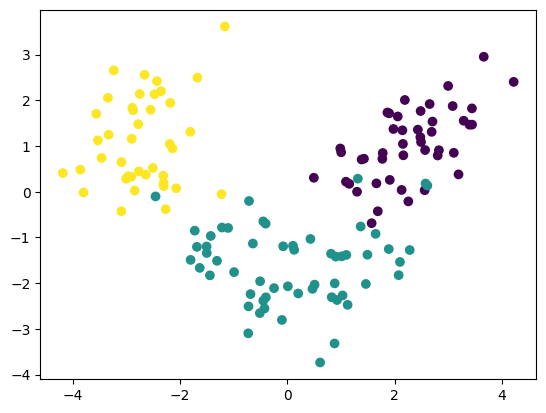

In [ ]:
plt.scatter(x=plot_data_with_scaling[0],
            y=plot_data_with_scaling[1],
            c = y_train);

##Effect of rescaling on model’s performance

First we will see how the optimal regularization of a LogisticRegressionCV depends on the scaling or non-scaling of the data:

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# loading data, and splitting them

x,y = load_wine(return_X_y=True, as_frame=True)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# creating 20 values between -5 and 5 for random cv

cs = np.logspace(-5,5,20)
cs

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

In [ ]:
# creating standard scaler and pca objects

scaler = StandardScaler().set_output(transform = 'pandas')
pca = PCA(n_components=2).fit(x_train)

In [ ]:
# fitting scaled and unscaled models


unscaled_clf = make_pipeline(pca, LogisticRegressionCV(Cs=cs))
unscaled_clf.fit(x_train, y_train)


scaled_clf = make_pipeline(scaler, pca, LogisticRegressionCV(Cs=cs))
scaled_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregressioncv',
                 LogisticRegressionCV(Cs=array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])))])

In [ ]:
# This will give you c value, if less suggests that regularization is required, if more then suggests that parameters are already optimized.

print(f"{unscaled_clf[-1].C_[0]:.4f}")
print(f"{scaled_clf[-1].C_[0]:.2f}")

0.0000
0.05


In [ ]:
# Lets check the accuracy score and log loss

from sklearn.metrics import accuracy_score, log_loss

In [ ]:
# Predicting

y_pred = unscaled_clf.predict(x_test)
y_pred_scaled = scaled_clf.predict(x_test)

In [ ]:
print(f'unscaled accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'scaled accuracy: {accuracy_score(y_test, y_pred_scaled):.2f}')

unscaled accuracy: 0.39
scaled accuracy: 1.00


In [ ]:
# log loss should be as minimal as possible

print(f'log_loss for unscaled: {log_loss(y_test, unscaled_clf.predict_proba(x_test))}')
print(f'log_loss for scaled: {log_loss(y_test, scaled_clf.predict_proba(x_test))}')

log_loss for unscaled: 1.165062889875597
log_loss for scaled: 0.18695368132514767


##Conclusion

With the above experiments we can conclude that scaling features is very important for a wide range of modelling. It improves the results for the following:
1. scaling is needed for PCA
2. scaling for models like linear | logistic | Knn is a must.
3. scaling can help feature columns with different ranges.